<a href="https://colab.research.google.com/github/DN554/Weather/blob/main/WEATHER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/weather_data_csv')
df

,Temperature,Humidity,Air_Pressure,Wind_Speed,Weather_Condition
0,25.07,10.01,998.89,0.44,Sunny
1,29.62,76.66,988.91,1.22,Rainy
2,7.83,69.00,952.23,36.70,Stormy
3,15.87,79.70,972.47,18.17,Cloudy
4,29.75,61.68,1039.54,29.21,Partly Cloudy
...,...,...,...,...,...
3995,36.06,21.35,1019.75,9.94,Sunny
3996,27.23,90.09,1009.58,16.43,Rainy
3997,7.79,68.34,984.11,41.80,Stormy
3998,19.44,60.29,985.72,18.37,Cloudy


In [ ]:
# EXPLORATORY DATA ANALYSIS to know about the information of the data
# info is the function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        4000 non-null   float64
 1   Humidity           4000 non-null   float64
 2   Air_Pressure       4000 non-null   float64
 3   Wind_Speed         4000 non-null   float64
 4   Weather_Condition  4000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 156.4+ KB


In [ ]:
df.describe()

,Temperature,Humidity,Air_Pressure,Wind_Speed
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,20.025558,59.970545,992.175127,18.634073
std,9.271277,23.570839,18.325582,12.680434
min,0.000000,10.010000,950.010000,0.000000
25%,13.315000,39.980000,979.070000,9.582500
50%,19.900000,63.010000,992.020000,15.275000
75%,26.622500,77.887500,1005.175000,24.800000
max,39.980000,99.960000,1039.910000,49.940000


In [ ]:
df['Weather_Condition'].value_counts()

,count
Weather_Condition,
Sunny,800
Rainy,800
Stormy,800
Cloudy,800
Partly Cloudy,800


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Air_Pressure,0
Wind_Speed,0
Weather_Condition,0


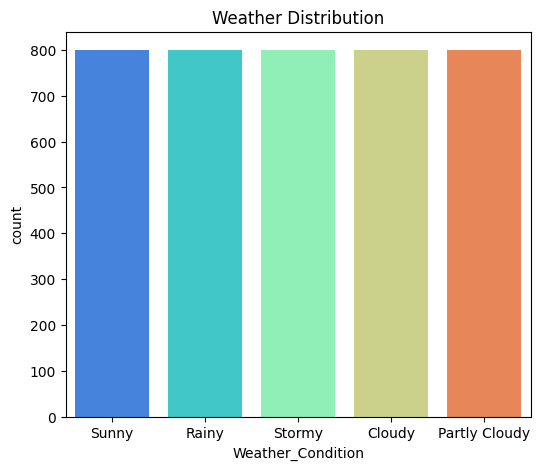

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Weather_Condition',data=df,palette='rainbow')
plt.title('Weather Distribution')
plt.show()

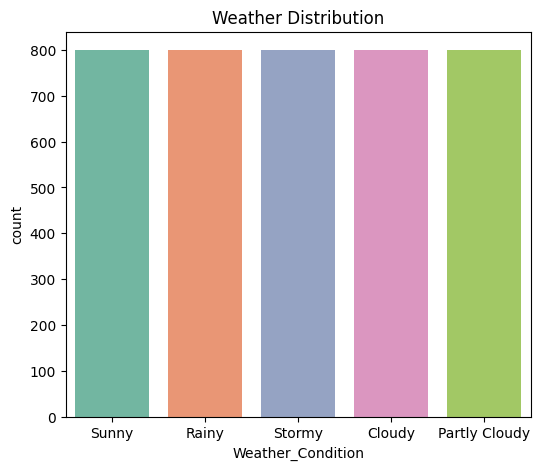

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Weather_Condition',data=df,palette='Set2')
plt.title('Weather Distribution')
plt.show()

In [ ]:

weather_counts = df['Weather_Condition'].value_counts()


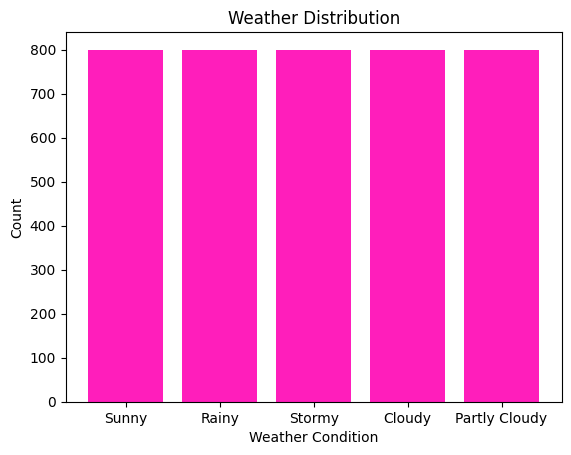

In [ ]:
plt.bar(weather_counts.index, weather_counts.values, color="#FF1EBB")
plt.title('Weather Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

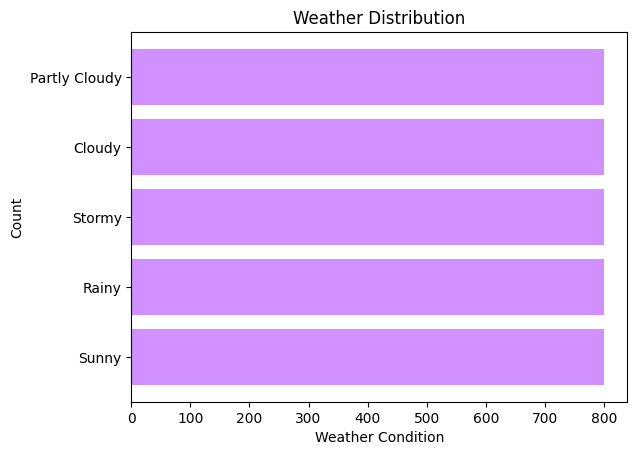

In [ ]:
plt.barh(weather_counts.index, weather_counts.values, color="#D090FF")
plt.title('Weather Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

<Figure size 1000x1000 with 0 Axes>

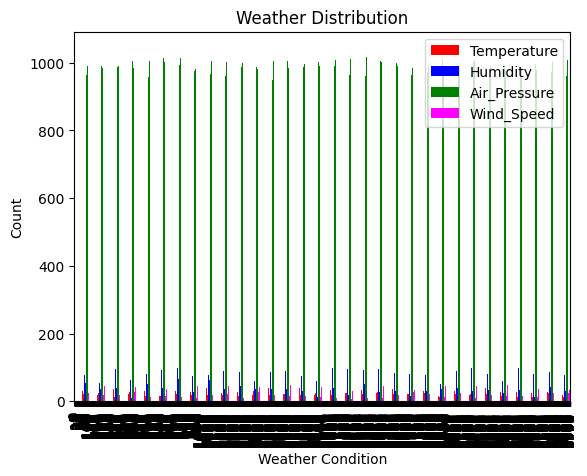

In [ ]:
plt.figure(figsize=(10,10))
df.plot(kind='bar',color=["red","blue","green","magenta","yellow"])
plt.title('Weather Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

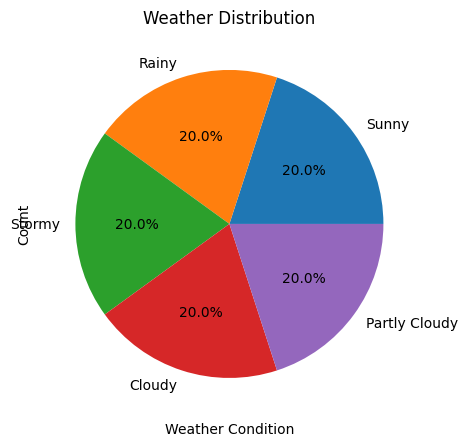

In [ ]:
plt.figure(figsize=(5,5))
df["Weather_Condition"].value_counts().plot.pie(autopct="%1.1f%%",color=sns.color_palette("Set2"))
plt.title('Weather Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

<Figure size 500x500 with 0 Axes>

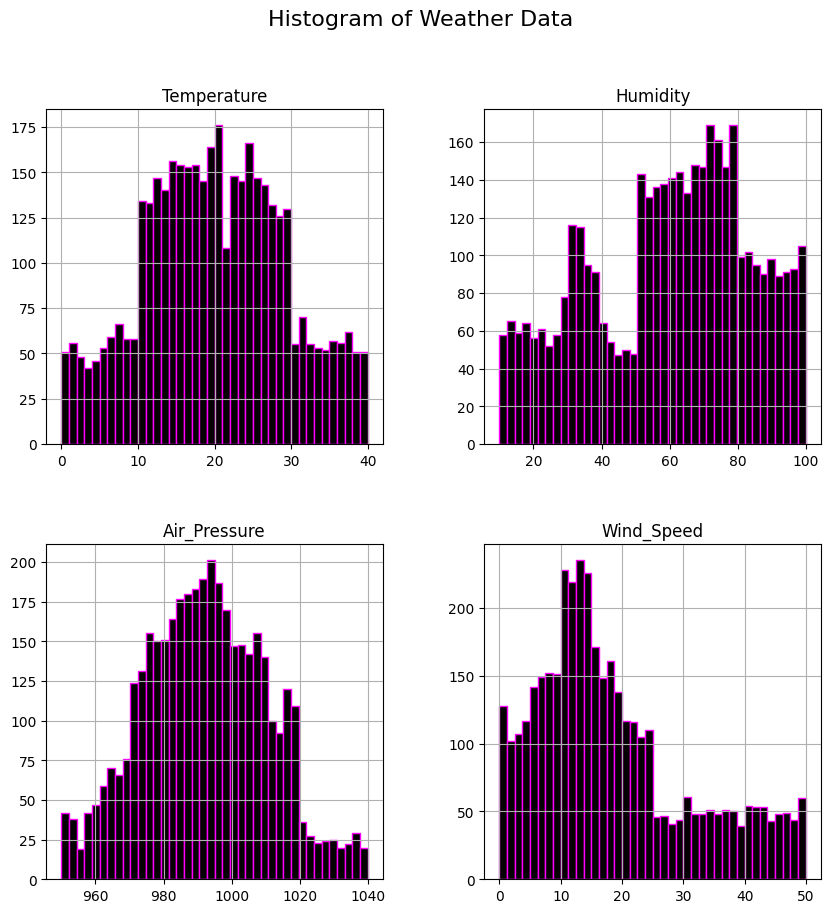

In [ ]:
plt.figure(figsize=(5,5))
df.drop(columns="Weather_Condition").hist(figsize=(10,10),bins=40,edgecolor="magenta",color="#050002")
plt.suptitle("Histogram of Weather Data",fontsize=16)
plt.show()

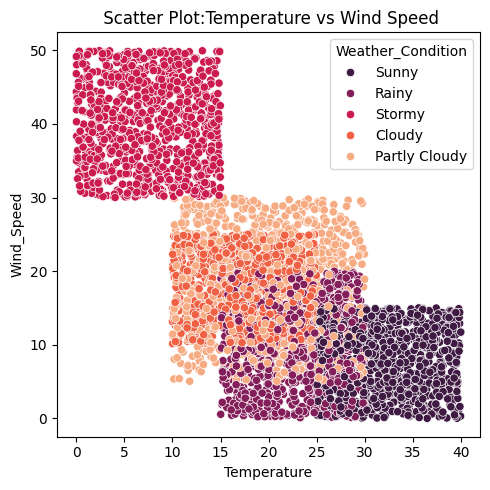

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x="Temperature",y="Wind_Speed",hue="Weather_Condition",palette="rocket")
plt.title(" Scatter Plot:Temperature vs Wind Speed")
plt.tight_layout()
plt.show()

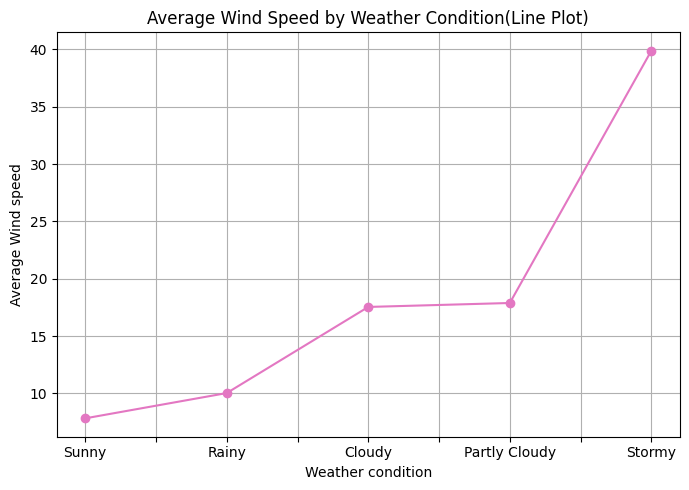

In [ ]:
wind_Speed_mean=df.groupby("Weather_Condition")["Wind_Speed"].mean().sort_values()
plt.figure(figsize=(7,5))
wind_Speed_mean.plot (kind="line",marker="o",color="tab:pink")
plt.title("Average Wind Speed by Weather Condition(Line Plot)")
plt.xlabel("Weather condition")
plt.ylabel("Average Wind speed")
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
plt.show()

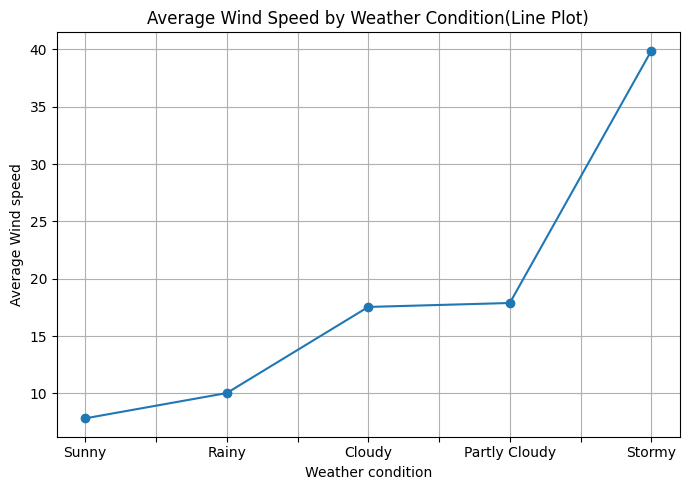

In [ ]:
wind_Speed_median=df.groupby("Weather_Condition")["Wind_Speed"].mean().sort_values()
plt.figure(figsize=(7,5))
wind_Speed_median.plot (kind="line",marker="o",color="tab:blue")
plt.title("Average Wind Speed by Weather Condition(Line Plot)")
plt.xlabel("Weather condition")
plt.ylabel("Average Wind speed")
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
plt.show()

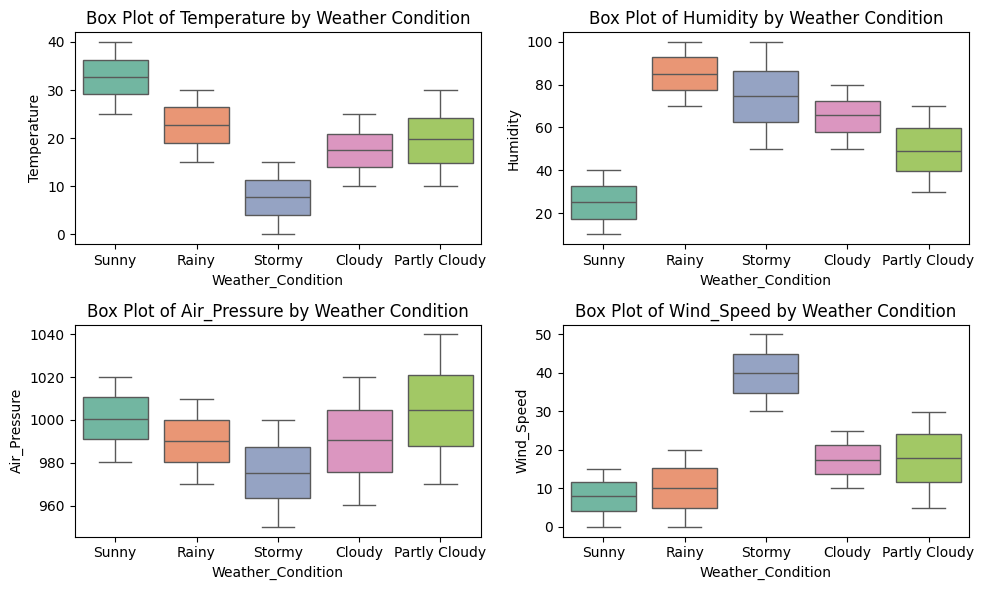

In [ ]:
#BOX PLOT
features = ['Temperature','Humidity','Air_Pressure','Wind_Speed']
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Weather_Condition', y=feature, data=df,order=df["Weather_Condition"].value_counts().index, palette='Set2')
    plt.title(f'Box Plot of {feature} by Weather Condition')
    plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [ ]:
features

['Temperature', 'Humidity', 'Air_Pressure', 'Wind_Speed']

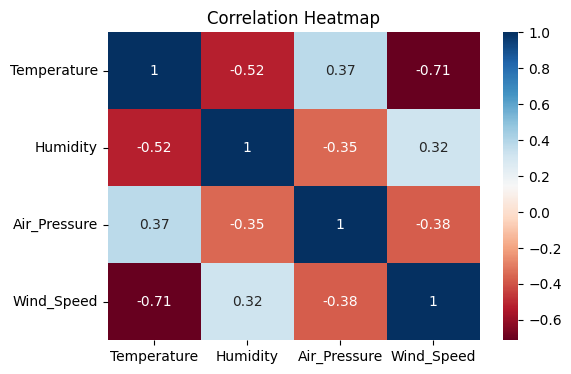

In [ ]:
#correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.drop(columns="Weather_Condition").corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()